In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

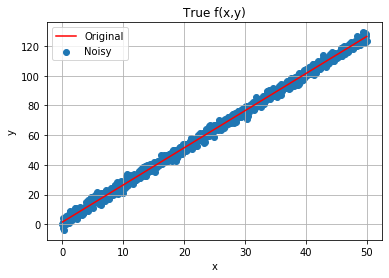

In [28]:
xstart = 0
xstop = 50
Npoints = 1000
x = np.linspace(xstart,xstop,Npoints).reshape(Npoints,1)
mTrue = 2.5
cTrue = 1.5
yTrue = mTrue*x+cTrue
noiseAmp = 2
yNoisy = yTrue+noiseAmp*np.random.randn(Npoints,1)
plt.scatter(x,yNoisy,label='Noisy')
plt.plot(x,yTrue,'r-',label='Original')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True f(x,y)')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
X = np.concatenate((x,yNoisy),axis=1)
X.shape

(1000, 2)

In [30]:
def computeGradient(X,y,y_estimate):
    '''Computes the gradient for the Quadratic loss function. X is an nx1 numPy array with n observations.
       delta_y = y-y_estimate , is an nx1 numPy array of the error in estimate at the current iteration.
       returns the 2x1 gradient at the current iteration
    '''
    n = X.shape[0]
    sum_err_in_estimate = sum(y-y_estimate)
    weighted_sum_err_in_estimate = sum(X*(sum_err_in_estimate*np.ones(n)))
    return -2*(np.array([sum_err_in_estimate,weighted_sum_err_in_estimate]))/n

In [31]:
def computeStochasticGradient(X,y,y_estimate):
    '''Computes the gradient for the Quadratic loss function by randomly choosing an observation. X is an nx1 numPy array with n observations.
       delta_y = y-y_estimate , is an nx1 numPy array of the error in estimate at the current iteration.
       returns the 2x1 gradient at the current iteration
    '''
    n = X.shape[0]
    chosenIndex = np.random.randint(0,n)
    err_in_estimate = y[chosenIndex]-y_estimate[chosenIndex]
    weighted_err_in_estimate = X[chosenIndex]*err_in_estimate
    return -2*(np.array([err_in_estimate,weighted_err_in_estimate]))

In [42]:
def computeMiniBatchGradient(X,y,y_estimate,batchIndices):
    '''Computes the gradient for the Quadratic loss function by randomly choosing an observation. X is an nx1 numPy array with n observations.
       delta_y = y-y_estimate , is an nx1 numPy array of the error in estimate at the current iteration.
       returns the 2x1 gradient at the current iteration
    '''
    n = X.shape[0]
    m=len(batchIndices)
    sum_err_in_estimate = sum(y[batchIndices]-y_estimate[batchIndices])
    weighted_sum_err_in_estimate = sum(X[batchIndices]*sum_err_in_estimate)
    return -2*(np.array([sum_err_in_estimate,weighted_sum_err_in_estimate]))/m

In [33]:
def FullBatchGradientDescent(X,y,start,step_size,tolerance,Niter):    
    ''' Will perform gradient descent on X (nx1), using target y (nx1) 
    '''
    gradNorm = 10000
    i = 0
    current_theta_estimate = start
    norms = []
    n = X.shape[0]            
    while i<Niter and gradNorm > tolerance:                
        y_estimate = current_theta_estimate[0]*np.ones(n)+current_theta_estimate[1]*X         
        grad = computeGradient(X,y,y_estimate)
        gradNorm = np.sqrt((grad.T).dot(grad))
        norms.append(gradNorm)        
        current_theta_estimate = current_theta_estimate - step_size*grad
        i+=1
    plt.plot(np.array(list(range(1,i+1))),norms)
    plt.xlabel('Iterations')
    plt.ylabel('||gradient||')
    plt.grid(True)
    plt.title("Convergence of gradient descent")
    print(f"Started at location {start}")
    print(f"Finished with {i} iterations")
    print(f"Finished with gradient norm = {gradNorm}")
    print(f"Finished at location {current_theta_estimate}")
    return current_theta_estimate
    

In [34]:
def StochasticGradientDescent(X,y,start,step_size,tolerance,Niter):    
    ''' Will perform gradient descent on X (nx1), using target y (nx1) 
    '''
    gradNorm = 10000
    i = 0
    current_theta_estimate = start
    norms = []
    n = X.shape[0]            
    while i<Niter and gradNorm > tolerance:                
        y_estimate = current_theta_estimate[0]*np.ones(n)+current_theta_estimate[1]*X         
        grad = computeStochasticGradient(X,y,y_estimate)
        gradNorm = np.sqrt((grad.T).dot(grad))
        norms.append(gradNorm)        
        current_theta_estimate = current_theta_estimate - step_size*grad
        i+=1
    plt.plot(np.array(list(range(1,i+1))),norms)
    plt.xlabel('Iterations')
    plt.ylabel('||gradient||')
    plt.grid(True)
    plt.title("Convergence of gradient descent")
    print(f"Started at location {start}")
    print(f"Finished with {i} iterations")
    print(f"Finished with gradient norm = {gradNorm}")
    print(f"Finished at location {current_theta_estimate}")
    return current_theta_estimate
    

In [44]:
def MiniBatchGradientDescent(X,y,start,step_size,tolerance,Nepochs,batchSize):    
    ''' Will perform gradient descent on X (nx1), using target y (nx1) 
    '''
    gradNorm = 10000
    i = 0
    current_theta_estimate = start
    norms = []
    n = X.shape[0]  
    NiterationsPerEpoch = n//batchSize
    while i<Nepochs and gradNorm > tolerance:
        batchIndices = getBatchIndices(n,batchSize)
        for iteration in range(NiterationsPerEpoch):
            y_estimate = current_theta_estimate[0]*np.ones(n)+current_theta_estimate[1]*X         
            grad = computeMiniBatchGradient(X,y,y_estimate,batchIndices[iteration])
            gradNorm = np.sqrt((grad.T).dot(grad))       
            current_theta_estimate = current_theta_estimate - step_size*grad
        norms.append(gradNorm) 
        i+=1
    plt.plot(np.array(list(range(1,i+1))),norms)
    plt.xlabel('Epochs')
    plt.ylabel('||gradient||')
    plt.grid(True)
    plt.title("Convergence of gradient descent")
    print(f"Started at location {start}")
    print(f"Finished with {i} iterations")
    print(f"Finished with gradient norm = {gradNorm}")
    print(f"Finished at location {current_theta_estimate}")
    return current_theta_estimate
    

In [36]:
def VanillaLinearRegressionFullBatch(X,y):    
    '''Assumes that the input matrix is an nx1 numPy array with n observations and y is an nx1 target vector 
    '''
    n = X.shape[0]
    theta_eatimate_start = np.random.rand(2)
    learning_rate = 1e-7
    err_tolerance = 1e-6
    MaxIter = 50000
    estimated_coeff = FullBatchGradientDescent(X,y,theta_eatimate_start,learning_rate,err_tolerance,MaxIter)
    return estimated_coeff

    
    
    


    
    
    

In [37]:
def VanillaLinearRegressionStochastic(X,y):    
    '''Assumes that the input matrix is an nx1 numPy array with n observations and y is an nx1 target vector 
    '''
    n = X.shape[0]
    theta_eatimate_start = np.random.rand(2)
    learning_rate = 1e-7
    err_tolerance = 1e-6
    MaxIter = 50000
    estimated_coeff = StochasticGradientDescent(X,y,theta_eatimate_start,learning_rate,err_tolerance,MaxIter)
    return estimated_coeff

    
    
    


    
    
    

In [38]:
def VanillaLinearRegressionMiniBatch(X,y):    
    '''Assumes that the input matrix is an nx1 numPy array with n observations and y is an nx1 target vector 
    '''
    n = X.shape[0]
    theta_eatimate_start = np.random.rand(2)
    learning_rate = 1e-7
    err_tolerance = 1e-6
    Nepochs = 100
    batchSize = Npoints//10
    estimated_coeff = MiniBatchGradientDescent(X,y,theta_eatimate_start,learning_rate,err_tolerance,Nepochs,batchSize)
    return estimated_coeff

    
    
    


    
    
    

Started at location [0.64299813 0.95154939]
Finished with 214 iterations
Finished with gradient norm = 8.799673885496556e-07
Finished at location [0.64306152 2.53631223]


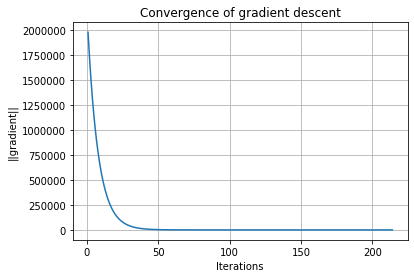

In [45]:
y_train = X[:,1]
X_train = X[:,0]
theta_est_full_batch = VanillaLinearRegressionFullBatch(X_train,y_train)


Started at location [0.01541659 0.74520646]
Finished with 50000 iterations
Finished with gradient norm = 19.121927088092757
Finished at location [0.07371044 2.54120053]


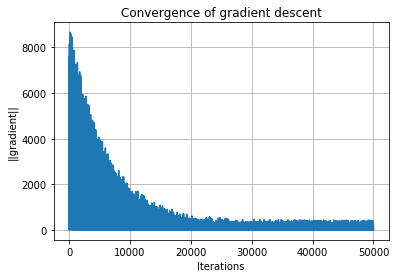

In [46]:
y_train = X[:,1]
X_train = X[:,0]
theta_est_stochastic = VanillaLinearRegressionStochastic(X_train,y_train)


Started at location [0.63007142 0.8086585 ]
Finished with 100 iterations
Finished with gradient norm = 682.0814592224154
Finished at location [0.63076091 2.53662242]


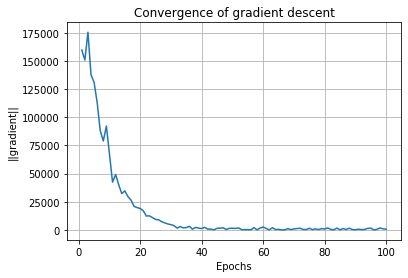

In [47]:
y_train = X[:,1]
X_train = X[:,0]
theta_est_mini_batch = VanillaLinearRegressionMiniBatch(X_train,y_train)


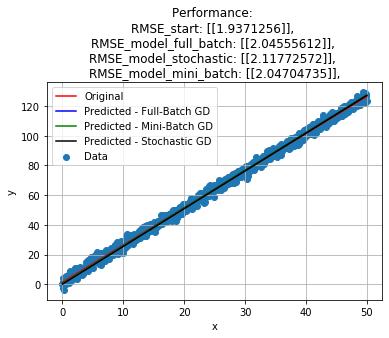

In [55]:
y_pred_full_batch = theta_est_full_batch[0]+theta_est_full_batch[1]*x
y_pred_stochastic = theta_est_stochastic[0]+theta_est_stochastic[1]*x
y_pred_mini_batch = theta_est_mini_batch[0]+theta_est_mini_batch[1]*x

rmse_original = np.sqrt(((yTrue-yNoisy).T).dot(yTrue-yNoisy)/Npoints)
rmse_pred_full_batch = np.sqrt(((yNoisy-y_pred_full_batch).T).dot(yNoisy-y_pred_full_batch)/Npoints)
rmse_pred_stochastic = np.sqrt(((yNoisy-y_pred_stochastic).T).dot(yNoisy-y_pred_stochastic)/Npoints)
rmse_pred_mini_batch = np.sqrt(((yNoisy-y_pred_mini_batch).T).dot(yNoisy-y_pred_mini_batch)/Npoints)
plt.scatter(x,yNoisy,label='Data')
plt.plot(x,yTrue,'r-',label='Original')
plt.plot(x,y_pred_full_batch,'b-',label='Predicted - Full-Batch GD')
plt.plot(x,y_pred_mini_batch,'g-',label='Predicted - Mini-Batch GD')
plt.plot(x,y_pred_stochastic,'k-',label='Predicted - Stochastic GD')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Performance: \nRMSE_start: {rmse_original}, \nRMSE_model_full_batch: {rmse_pred_full_batch}, \nRMSE_model_stochastic: {rmse_pred_stochastic}, \nRMSE_model_mini_batch: {rmse_pred_mini_batch},')
plt.legend()
plt.grid(True)
plt.show()



In [52]:
linReg = LinearRegression()
linReg.fit(X_train.reshape(-1,1),y_train)
theta_skl = np.concatenate((np.array([linReg.intercept_]),linReg.coef_))
print(theta_skl)

[1.81335728 2.4895004 ]


In [53]:
def getBatchIndices(n,b):
    availableChoices = list(range(n))
    batchIndices=[]
    while len(availableChoices)>0:
        currentBatch= []
        for i in range(b):
            chosenIndex = np.random.choice(availableChoices)
            currentBatch.append(chosenIndex)
            availableChoices.remove(chosenIndex)
        batchIndices.append(currentBatch)
    return batchIndices
        